In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
file_path = '/content/gdrive/My Drive/S2-2021 APPHY157/B2/DiscreteFT/'

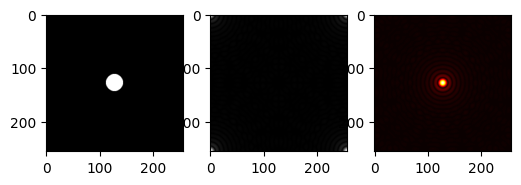

In [3]:
import numpy as np 
import cv2 as cv
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# create circle
N = 256
x = np.linspace(-2,2,N)
y = x
r= 0.25
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 +Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<r)] = 1.0

plt.subplot(131)
plt.imshow(A, cmap='gray')

# save image
img = A/ A.max()
img = img* 255 
#cv.imwrite(f"{file_path}circle{r}.jpg",img)

FA = np.fft.fft2(A)
plt.subplot(132)
plt.imshow(abs(FA), cmap = 'gray')
img = abs(FA)/ abs(FA).max()
img = img* 255 
#cv.imwrite(f"{file_path}circle{r}fft.jpg",img)

FAshifted = np.fft.fftshift(FA)
plt.subplot(133)
plt.imshow((abs(FAshifted)), cmap='hot')

img = abs(FAshifted)/ abs(FAshifted).max()
img = img* 255 
#cv.imwrite(f"{file_path}circle{r}fftshifted.jpg",img)

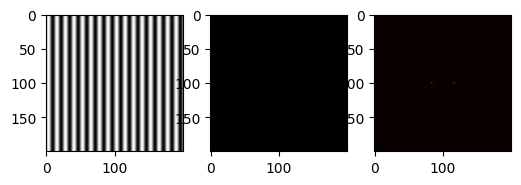

In [4]:
#sinusoid along the x-direction
N = 200
x = np.linspace(-2,2,N)
y = x
X,Y = np.meshgrid(x,y)
f = 4
k = np.sin(2*np.pi*f*X)

img = k/ k.max()
img = img* 255 
#cv.imwrite(f"{file_path}sine{f}.jpg",img)

plt.subplot(131)
plt.imshow(k,cmap='gray')

# apply FFT
FA = np.fft.fft2(k)

plt.subplot(132)
plt.imshow(abs(FA), cmap = 'gray')

img = abs(FA)/ abs(FA).max()
img = img* 255 
#cv.imwrite(f"{file_path}sine{f}fft.jpg",img)

# FFT shifted
FAshifted = np.fft.fftshift(FA)

plt.subplot(133)
plt.imshow((abs(FAshifted)), cmap='hot')

img = abs(FAshifted)/ abs(FAshifted).max()
img = img* 255 
#cv.imwrite(f"{file_path}sine{f}fftshifted.jpg",img)


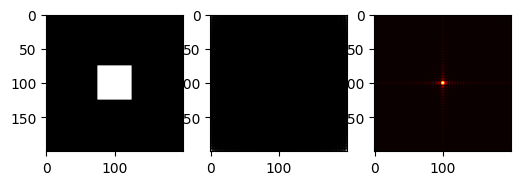

In [5]:
#square aperture
N = 200 
x = np.linspace(-2,2,N)
y = x
X,Y = np.meshgrid(x,y)
R = 0.5
A = np.zeros([N,N])
A[(abs(X)<R) & (abs(Y)<R)] = 1.0

img = A/ A.max()
img = img* 255 
#cv.imwrite(f"{file_path}square{R}.jpg",img)

plt.subplot(131)
plt.imshow(A,cmap='gray')

# apply FFT
FA = np.fft.fft2(A)

plt.subplot(132)
plt.imshow(abs(FA), cmap = 'gray')

img = abs(FA)/ abs(FA).max()
img = img* 255 
#cv.imwrite(f"{file_path}square{R}fft.jpg",img)

# FFT shifted
FAshifted = np.fft.fftshift(FA)

plt.subplot(133)
plt.imshow((abs(FAshifted)), cmap='hot')

img = abs(FAshifted)/ abs(FAshifted).max()
img = img* 255 
#cv.imwrite(f"{file_path}square{R}fftshifted.jpg",img)

True

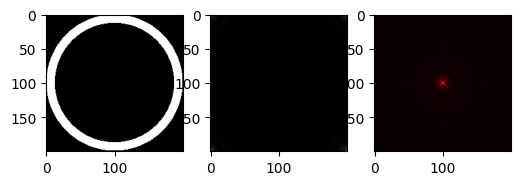

In [6]:
#annular aperture
N = 200 
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
r1=2;
r2=r1-0.25;
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[(R<r1) & (R>r2)] = 1.0

img = A/ A.max()
img = img* 255 
cv.imwrite(f"{file_path}annular{r2}.jpg",img)

plt.subplot(131)
plt.imshow(A,cmap='gray')

# apply FFT
FA = np.fft.fft2(A)

plt.subplot(132)
plt.imshow(abs(FA), cmap = 'gray')

img = abs(FA)/ abs(FA).max()
img = img* 255 
#cv.imwrite(f"{file_path}annular{r1}fft.jpg",img)

# FFT shifted
FAshifted = np.fft.fftshift(FA)

plt.subplot(133)
plt.imshow((abs(FAshifted)), cmap='hot')

img = abs(FAshifted)/ abs(FAshifted).max()
img = img* 255 
cv.imwrite(f"{file_path}annular{r2}fftshifted.jpg",img)

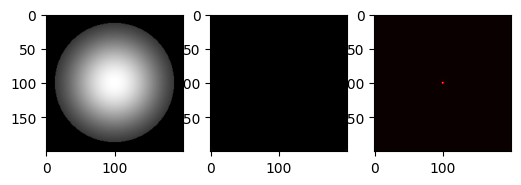

In [7]:
#gaussian aperture
N = 200 #the higher num is the finer
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
r = 1.75
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<r)] = 1.0
a=1/(np.sqrt(2*np.pi));b=0;c=1;#c=sigma
z=a*np.exp(-(R-b)**2/(2*c**2))*A;
#z = np.exp(-R**2/2)*A
#z=z*A;

img = z/ z.max()
img = img* 255 
#cv.imwrite(f"{file_path}gaussian{c}.jpg",img)

plt.subplot(131)
plt.imshow(z,cmap='gray')

# apply FFT
FA = np.fft.fft2(z)

plt.subplot(132)
plt.imshow(abs(FA), cmap = 'gray')

img = abs(FA)/ abs(FA).max()
img = img* 255 
#cv.imwrite(f"{file_path}gaussian{c}fft.jpg",img)

# FFT shifted
FAshifted = np.fft.fftshift(FA)

plt.subplot(133)
plt.imshow((abs(FAshifted)), cmap='hot')

img = abs(FAshifted)/ abs(FAshifted).max()
img = img* 255 
#cv.imwrite(f"{file_path}gaussian{c}fftshifted.jpg",img)

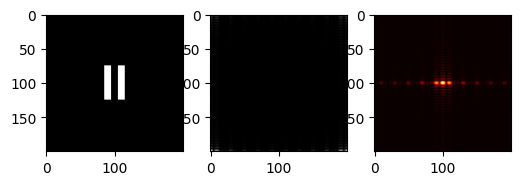

In [8]:
#double slit
N = 200 
x = np.linspace(-2,2,N)
y = x
X,Y = np.meshgrid(x,y)
A = np.zeros([N,N])

d = 10
lx = 10
ly = 50
ind1 = N//2 -d//2
ind2 = N//2 +d//2
y1 = N//2 - ly//2
y2 = N//2 + ly//2
A[y1:y2,ind1-lx:ind1] = 1
A[y1:y2,ind2:ind2+lx] = 1

rgbim = A*255
img =rgbim.astype(np.uint8)
#cv.imwrite(f"{file_path}double{d}.jpg",img)

plt.subplot(131)
plt.imshow(A,cmap='gray')

# apply FFT
FA = np.fft.fft2(A)

plt.subplot(132)
plt.imshow(abs(FA), cmap = 'gray')

img = abs(FA)/ abs(FA).max()
img = img* 255 
#cv.imwrite(f"{file_path}double{d}fft.jpg",img)

# FFT shifted
FAshifted = np.fft.fftshift(FA)

plt.subplot(133)
plt.imshow((abs(FAshifted)), cmap='hot')

img = abs(FAshifted)/ abs(FAshifted).max()
img = img* 255 
#cv.imwrite(f"{file_path}double{d}fftshifted.jpg",img)